# TOPIK: Sampling & Exploratory Data Analysis (EDA)
# DATASET: IRIS



## BAGIAN 1 - IMPORT LIBRARY

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

sns.set(style="whitegrid")  # Styling grafik

## BAGIAN 2 - LOAD DATASET

In [38]:
iris = load_iris()

# Membuat DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Menambahkan kolom spesies
data["species"] = iris.target
data["species"] = data["species"].map(dict(enumerate(iris.target_names)))

print("===== 5 DATA PERTAMA =====")
print(data.head())

===== 5 DATA PERTAMA =====
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### BAGIAN A - EKSPLORASI DATA AWAL

#### 1. Informasi Dataset

In [39]:
print("\n===== INFORMASI DATASET =====")
print("Jumlah Data :", data.shape[0])
print("Jumlah Variabel :", data.shape[1])
print("\nTipe Data:")
print(data.dtypes)
print("\nJumlah Masing-Masing Spesies:")
print(data["species"].value_counts())


===== INFORMASI DATASET =====
Jumlah Data : 150
Jumlah Variabel : 5

Tipe Data:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Jumlah Masing-Masing Spesies:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


#### 2. Statistika Deskriptif

In [40]:
print("\n===== STATISTIK DESKRIPTIF =====")

for col in iris.feature_names:
    print(f"\nVariabel: {col}")
    print("Mean   :", data[col].mean())
    print("Median :", data[col].median())
    print("Std    :", data[col].std())
    print("Min    :", data[col].min())
    print("Max    :", data[col].max())


===== STATISTIK DESKRIPTIF =====

Variabel: sepal length (cm)
Mean   : 5.843333333333334
Median : 5.8
Std    : 0.8280661279778629
Min    : 4.3
Max    : 7.9

Variabel: sepal width (cm)
Mean   : 3.0573333333333337
Median : 3.0
Std    : 0.435866284936698
Min    : 2.0
Max    : 4.4

Variabel: petal length (cm)
Mean   : 3.7580000000000005
Median : 4.35
Std    : 1.7652982332594667
Min    : 1.0
Max    : 6.9

Variabel: petal width (cm)
Mean   : 1.1993333333333336
Median : 1.3
Std    : 0.7622376689603465
Min    : 0.1
Max    : 2.5


#### 3. VISUALISASI DISTRIBUSI

##### Histogram

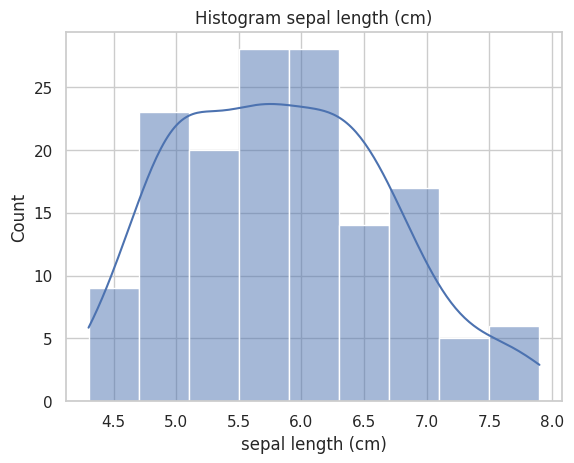

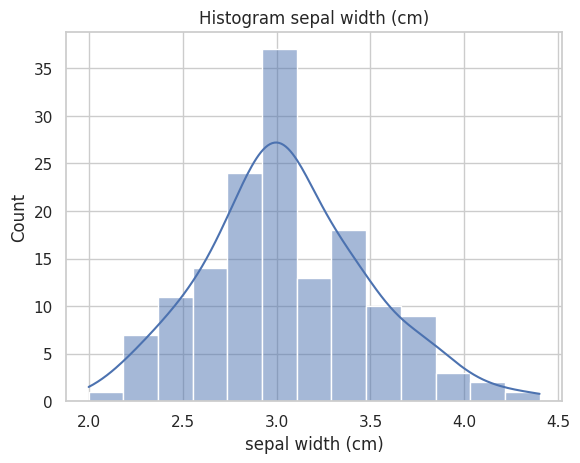

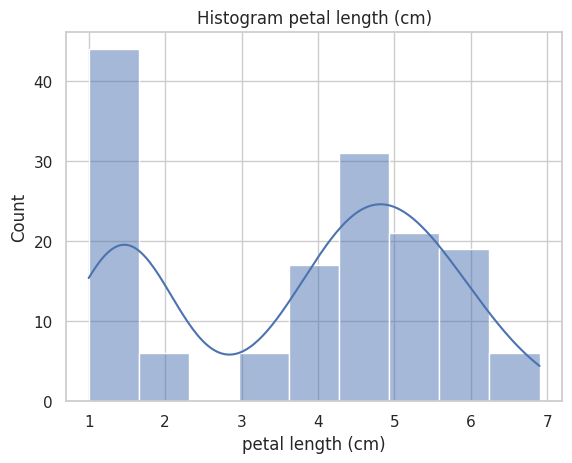

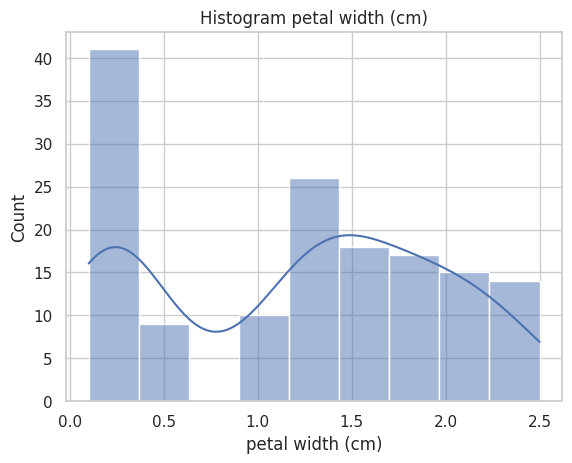

In [41]:
for col in iris.feature_names:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram {col}")
    plt.show()

##### Boxplot

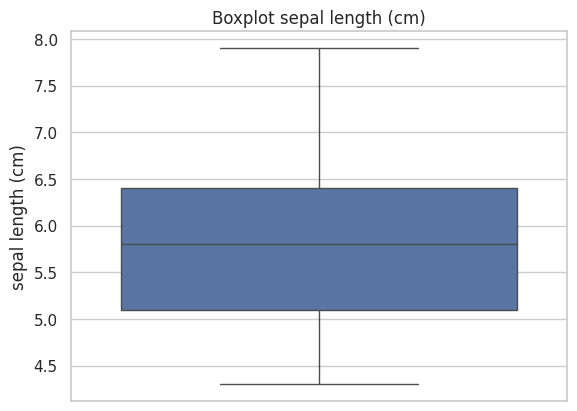

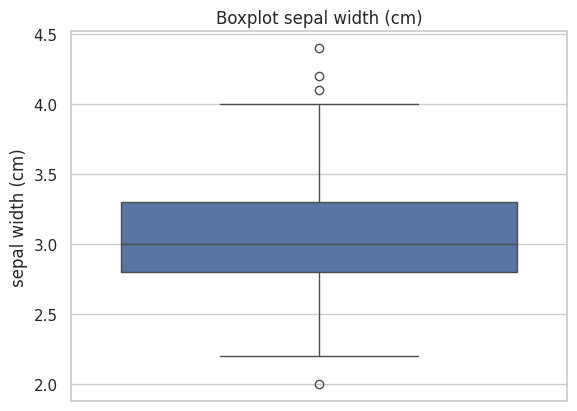

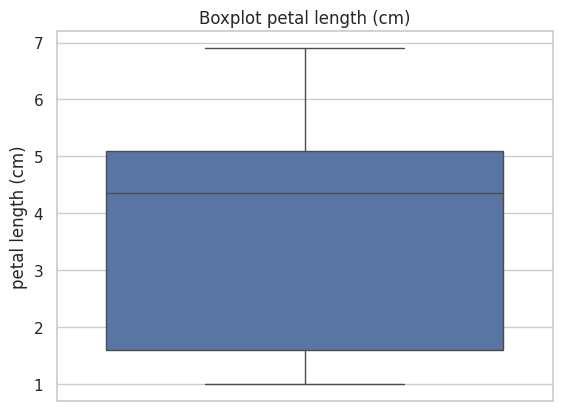

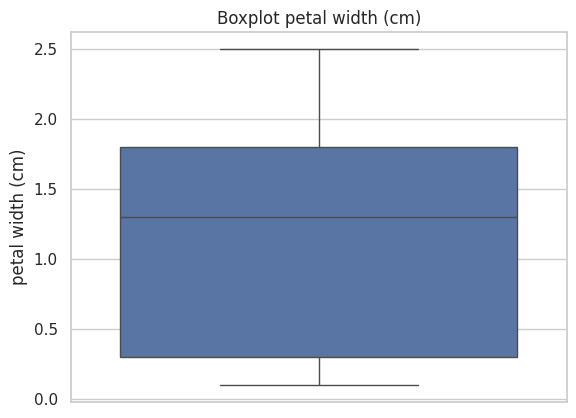

In [42]:
for col in iris.feature_names:
    plt.figure()
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot {col}")
    plt.show()

#### 4. Visualisasi Berdasarkan Spesies

###### Boxplot per speies

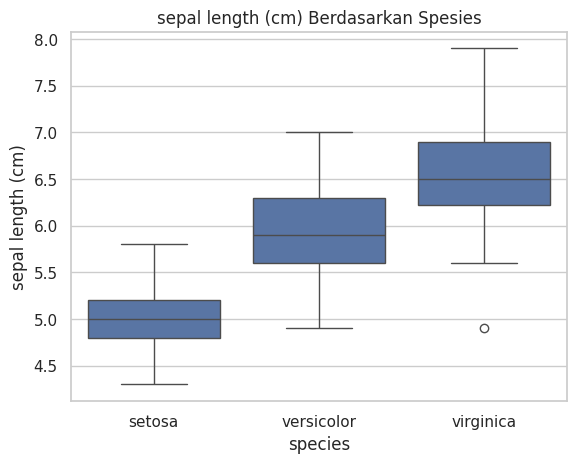

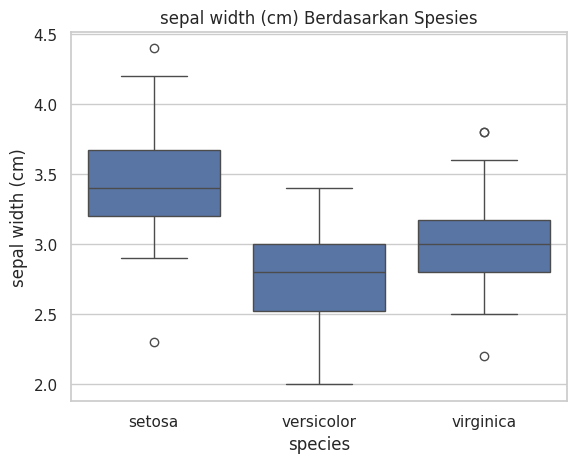

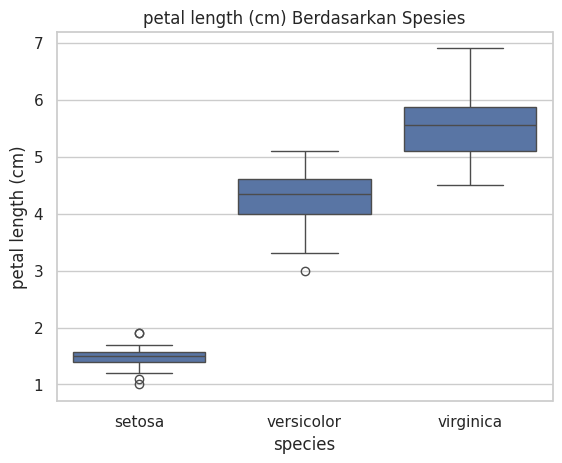

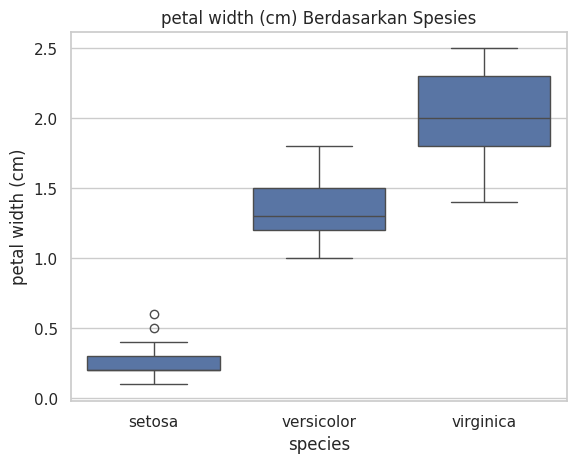

In [43]:
for col in iris.feature_names:
    plt.figure()
    sns.boxplot(x="species", y=col, data=data)
    plt.title(f"{col} Berdasarkan Spesies")
    plt.show()

###### Violin Plot

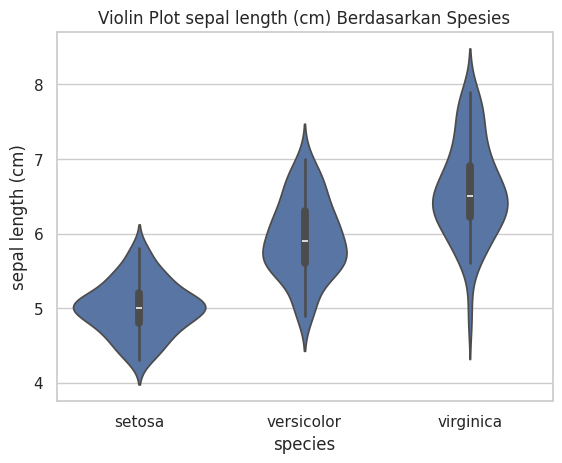

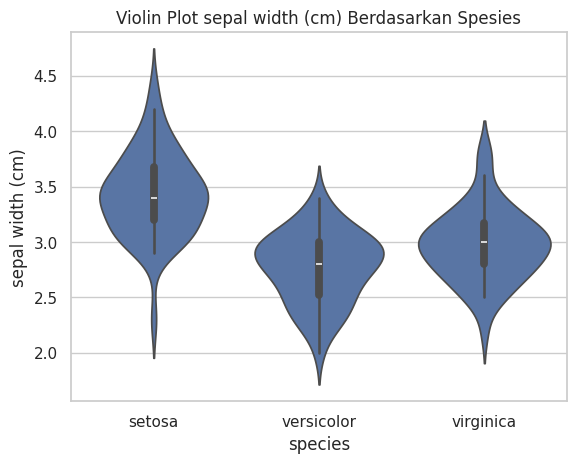

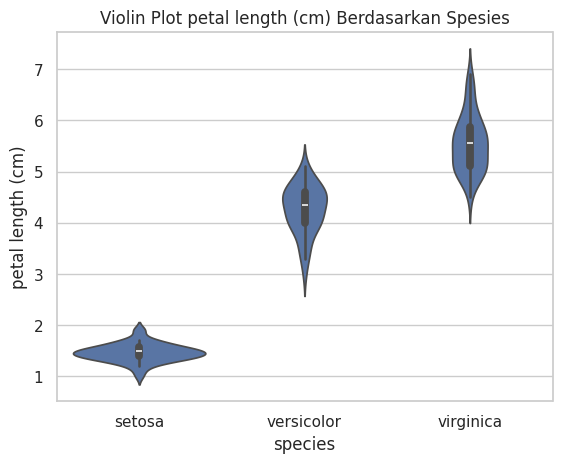

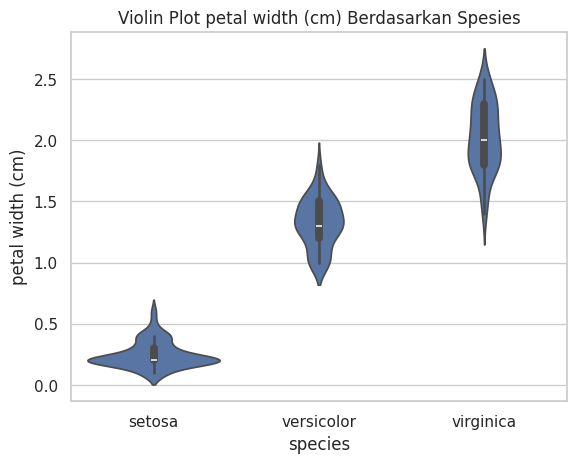

In [44]:
for col in iris.feature_names:
    plt.figure()
    sns.violinplot(x="species", y=col, data=data)
    plt.title(f"Violin Plot {col} Berdasarkan Spesies")
    plt.show()

### BAGIAN B - BOOTSTRAP SAMPLING

In [60]:
# Pilih variabel petal length
petal_length = data["petal length (cm)"]

##### 1. BOOTSTRAP TUNGGAL

In [61]:
mean_asli = np.mean(petal_length)
median_asli = np.median(petal_length)

bootstrap_sample = np.random.choice(
    petal_length,
    size=len(petal_length),
    replace=True
)

mean_bootstrap = np.mean(bootstrap_sample)
median_bootstrap = np.median(bootstrap_sample)

print("\n===== BOOTSTRAP TUNGGAL =====")
print("Mean Bootstrap   :", mean_bootstrap)
print("Median Bootstrap :", median_bootstrap)

print("\n===== PERBANDINGAN DENGAN DATA ASLI =====")
print("Mean Asli        :", mean_asli)
print("Median Asli      :", median_asli)


===== BOOTSTRAP TUNGGAL =====
Mean Bootstrap   : 3.6319999999999997
Median Bootstrap : 4.05

===== PERBANDINGAN DENGAN DATA ASLI =====
Mean Asli        : 3.7580000000000005
Median Asli      : 4.35


##### 2. BOOTSTRAP BERULANG

In [47]:
def bootstrap_means(data, n_bootstrap):
    means = []
    for i in range(n_bootstrap):
        sample = np.random.choice(
            data,
            size=len(data),
            replace=True
        )
        means.append(np.mean(sample))
    return np.array(means)

means_100 = bootstrap_means(petal_length, 100)
means_1000 = bootstrap_means(petal_length, 1000)
means_10000 = bootstrap_means(petal_length, 10000)

#### 3. VISUALISASI BOOTSTRAP

##### Histogram

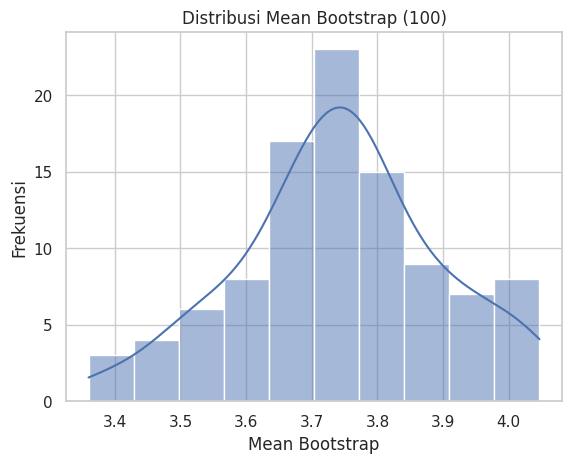

In [48]:
plt.figure()
sns.histplot(means_100, kde=True)
plt.title("Distribusi Mean Bootstrap (100)")
plt.xlabel("Mean Bootstrap")
plt.ylabel("Frekuensi")
plt.show()

##### Boxplot

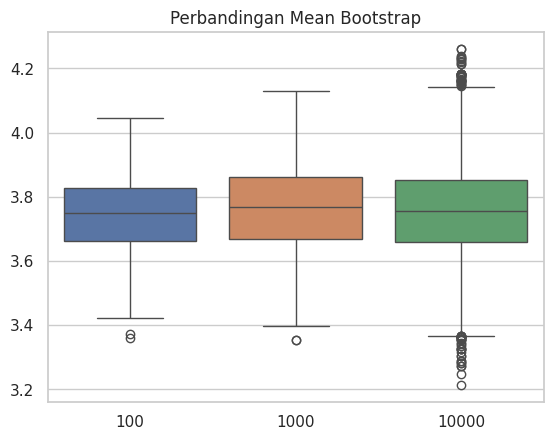

In [49]:
plt.figure()
sns.boxplot(data=[means_100, means_1000, means_10000])
plt.xticks([0,1,2], ["100","1000","10000"])
plt.title("Perbandingan Mean Bootstrap")
plt.show()

#### 4. INTERVAL KEPERCAYAAN 95%

In [50]:
def confidence_interval(means):
    lower = np.percentile(means, 2.5)
    upper = np.percentile(means, 97.5)
    return lower, upper

ci_100 = confidence_interval(means_100)
ci_1000 = confidence_interval(means_1000)
ci_10000 = confidence_interval(means_10000)

print("\n===== INTERVAL KEPERCAYAAN 95% =====")
print("CI 100   :", ci_100)
print("CI 1000  :", ci_1000)
print("CI 10000 :", ci_10000)


===== INTERVAL KEPERCAYAAN 95% =====
CI 100   : (np.float64(3.43065), np.float64(4.031750000000001))
CI 1000  : (np.float64(3.4839833333333328), np.float64(4.035333333333333))
CI 10000 : (np.float64(3.4739999999999993), np.float64(4.039333333333333))


## BAGIAN C - PERBANDINGAN DAN ANALISIS

##### Apakah mean bootstrap mendekati mean data asli?

In [51]:
# Hitung rata-rata dari distribusi mean bootstrap
mean_boot_100 = np.mean(means_100)
mean_boot_1000 = np.mean(means_1000)
mean_boot_10000 = np.mean(means_10000)

print("Mean Data Asli :", mean_asli)

print("\nMean Bootstrap 100   :", mean_boot_100)
print("Mean Bootstrap 1000  :", mean_boot_1000)
print("Mean Bootstrap 10000 :", mean_boot_10000)

# Hitung selisih absolut
print("\nSelisih terhadap Mean Asli:")
print("100   :", abs(mean_boot_100 - mean_asli))
print("1000  :", abs(mean_boot_1000 - mean_asli))
print("10000 :", abs(mean_boot_10000 - mean_asli))

Mean Data Asli : 3.7580000000000005

Mean Bootstrap 100   : 3.7419399999999996
Mean Bootstrap 1000  : 3.765812
Mean Bootstrap 10000 : 3.7564724666666662

Selisih terhadap Mean Asli:
100   : 0.01606000000000085
1000  : 0.007811999999999486
10000 : 0.001527533333334219


##### Bagaimana perubahan distribusi saat jumlah bootstrap bertambah?

In [52]:
print("Standar Deviasi Distribusi Mean:")

print("Bootstrap 100   :", np.std(means_100))
print("Bootstrap 1000  :", np.std(means_1000))
print("Bootstrap 10000 :", np.std(means_10000))

Standar Deviasi Distribusi Mean:
Bootstrap 100   : 0.1523854497282759
Bootstrap 1000  : 0.13860081846158856
Bootstrap 10000 : 0.1437476783879154


##### Mana yang lebih stabil: 100, 1000, atau 10000?

In [53]:
width_100 = ci_100[1] - ci_100[0]
width_1000 = ci_1000[1] - ci_1000[0]
width_10000 = ci_10000[1] - ci_10000[0]

print("Lebar CI 100   :", width_100)
print("Lebar CI 1000  :", width_1000)
print("Lebar CI 10000 :", width_10000)

# Tentukan yang paling stabil (CI paling sempit)
widths = {
    "100": width_100,
    "1000": width_1000,
    "10000": width_10000
}

paling_stabil = min(widths, key=widths.get)

print("\nBootstrap paling stabil:", paling_stabil)

Lebar CI 100   : 0.6011000000000006
Lebar CI 1000  : 0.5513500000000002
Lebar CI 10000 : 0.5653333333333341

Bootstrap paling stabil: 1000


##### Apakah mean asli berada dalam interval kepercayaan?

In [54]:
print("Mean dalam CI 100   :", ci_100[0] <= mean_asli <= ci_100[1])
print("Mean dalam CI 1000  :", ci_1000[0] <= mean_asli <= ci_1000[1])
print("Mean dalam CI 10000 :", ci_10000[0] <= mean_asli <= ci_10000[1])

Mean dalam CI 100   : True
Mean dalam CI 1000  : True
Mean dalam CI 10000 : True


##### Mengapa satu data bisa muncul berkali-kali pada bootstrap?

In [55]:
# Ambil satu bootstrap sample
bootstrap_sample = np.random.choice(
    petal_length,
    size=len(petal_length),
    replace=True  # inilah penyebab data bisa muncul berulang
)

# Hitung frekuensi kemunculan tiap nilai
unique, counts = np.unique(bootstrap_sample, return_counts=True)

print("Nilai yang muncul lebih dari 1 kali:")
for u, c in zip(unique, counts):
    if c > 1:
        print(f"Nilai {u} muncul {c} kali")

Nilai yang muncul lebih dari 1 kali:
Nilai 1.3 muncul 13 kali
Nilai 1.4 muncul 19 kali
Nilai 1.5 muncul 14 kali
Nilai 1.6 muncul 5 kali
Nilai 1.7 muncul 3 kali
Nilai 1.9 muncul 2 kali
Nilai 3.3 muncul 2 kali
Nilai 3.5 muncul 3 kali
Nilai 3.9 muncul 2 kali
Nilai 4.0 muncul 8 kali
Nilai 4.2 muncul 2 kali
Nilai 4.3 muncul 4 kali
Nilai 4.4 muncul 3 kali
Nilai 4.5 muncul 9 kali
Nilai 4.6 muncul 3 kali
Nilai 4.7 muncul 6 kali
Nilai 4.8 muncul 4 kali
Nilai 4.9 muncul 4 kali
Nilai 5.0 muncul 3 kali
Nilai 5.1 muncul 9 kali
Nilai 5.3 muncul 2 kali
Nilai 5.4 muncul 3 kali
Nilai 5.5 muncul 5 kali
Nilai 5.6 muncul 8 kali
Nilai 5.8 muncul 2 kali
Nilai 6.0 muncul 2 kali


###### Karena replace=True, setiap pengambilan tidak menghilangkan data dari populasi, sehingga satu nilai bisa terambil berkali-kali

## BAGIAN D - KESIMPULAN OTOMATIS

##### Insight Utama dari EDA

In [56]:
print("1. INSIGHT UTAMA DARI EDA")
print(f"- Dataset memiliki {data.shape[0]} data dan {data.shape[1]} variabel.")
print("- Variabel numerik terdiri dari sepal length, sepal width, petal length, dan petal width.")
print("- Distribusi petal length dan petal width menunjukkan perbedaan yang jelas antar spesies.\n")


1. INSIGHT UTAMA DARI EDA
- Dataset memiliki 150 data dan 5 variabel.
- Variabel numerik terdiri dari sepal length, sepal width, petal length, dan petal width.
- Distribusi petal length dan petal width menunjukkan perbedaan yang jelas antar spesies.



##### Karakteristik Tiap Spesies

In [57]:
print("2. KARAKTERISTIK TIAP SPESIES (Berdasarkan Mean Petal Length)")

mean_species = data.groupby("species")["petal length (cm)"].mean()
print(mean_species)

print("\nInterpretasi:")
print("- Setosa memiliki petal paling kecil.")
print("- Versicolor memiliki ukuran sedang.")
print("- Virginica memiliki petal paling besar.")
print("- Perbedaan paling jelas terlihat pada variabel petal length dan petal width.\n")

2. KARAKTERISTIK TIAP SPESIES (Berdasarkan Mean Petal Length)
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

Interpretasi:
- Setosa memiliki petal paling kecil.
- Versicolor memiliki ukuran sedang.
- Virginica memiliki petal paling besar.
- Perbedaan paling jelas terlihat pada variabel petal length dan petal width.



##### Manfaat Bootstrap

In [58]:
print("3. MANFAAT BOOTSTRAP DALAM ANALISIS DATA")
print("- Mengestimasi distribusi sampling tanpa asumsi distribusi normal.")
print("- Menghitung interval kepercayaan secara empiris.")
print("- Mengukur kestabilan estimasi mean dari sampel.\n")

3. MANFAAT BOOTSTRAP DALAM ANALISIS DATA
- Mengestimasi distribusi sampling tanpa asumsi distribusi normal.
- Menghitung interval kepercayaan secara empiris.
- Mengukur kestabilan estimasi mean dari sampel.



##### Jumlah Bootstrap yang Cukup

In [59]:
width_100 = ci_100[1] - ci_100[0]
width_1000 = ci_1000[1] - ci_1000[0]
width_10000 = ci_10000[1] - ci_10000[0]

widths = {
    "100": width_100,
    "1000": width_1000,
    "10000": width_10000
}

paling_stabil = min(widths, key=widths.get)

print("4. REKOMENDASI JUMLAH BOOTSTRAP")
print(f"- Bootstrap paling stabil berdasarkan lebar CI adalah: {paling_stabil}")
print("- Secara umum, 1000 atau 10000 bootstrap sudah cukup stabil untuk analisis.")

4. REKOMENDASI JUMLAH BOOTSTRAP
- Bootstrap paling stabil berdasarkan lebar CI adalah: 1000
- Secara umum, 1000 atau 10000 bootstrap sudah cukup stabil untuk analisis.
